In [2]:
# per B

# 1. equilibrate
# 2. find autocorrelation x5
# 3. simulate very long run
# 4. calculate specific heat capacity

from VectorMC import *

# 1. equilibrate

def equilibrate(B):
    model = VectorSpinMC(B=B,attn_norm='blog',reduction_type='AC')
    if B < 1:
        steps = 20
    elif B < 10:
        steps = 8
    else:
        steps = 2
    m_states = model.fast_long_run(steps,batch_size=8)
    np.save(path+'\\temp\\last_state.npy', m_states[-1])


# 2. find autocorrelation
import pickle

def AC(B):
    model = VectorSpinMC(B=B,attn_norm='blog',reduction_type='AC')
    eq_state = np.load(path+'\\temp\\last_state.npy')
    last_state1 = model.short_run(int(5e4),m_0=eq_state)[-1]
    m_states = model.fast_long_run(10,m_0=last_state1)
    ness_eq = VectorSpinMC(B=B,attn_norm='blog',reduction_type='AC').ness_sim(m_states)
    AC = AutoCorrelation(ness_eq)
    return np.sum(AC)

def ACs(B,repetitions=8):
    with open(path+"\\taus\\tau_dict.pkl", 'rb') as file:
        tau_dict = pickle.load(file)
    taus = []
    for i in range(repetitions):
        taus.append(float(AC(B)))
    try:
        list_ = tau_dict['B'+str(B)]
        list_.extend(taus)
        tau_dict['B'+str(B)] = list_
    except:
        tau_dict['B'+str(B)] = taus
    with open(path+"\\taus\\tau_dict.pkl", 'wb') as file:
        pickle.dump(tau_dict, file)

# 3. simulate very long run
# 4. calculate specific heats

def longrun(B):
    with open(path+"\\taus\\tau_dict.pkl", 'rb') as file:
        tau_dict = pickle.load(file)
    avg_tau = np.mean(tau_dict['B'+str(B)])
    blocks = 15
    M_steps = np.ceil(avg_tau*1000*16*blocks/1e6) # tau * ACredu * blocklength * blocks / millions
    print(f'for B={B}, avg_tau={avg_tau}, M_steps={M_steps}')
    #simulate long run
    eq_state = np.load(path+'\\temp\\last_state.npy')
    model = VectorSpinMC(B=B,attn_norm='blog',reduction_type='block')
    last_state1 = model.short_run(int(1e5),m_0=eq_state)[-1]
    m_states = model.fast_long_run(M_steps,m_0=last_state1)
    np.save(path+f'\\temp\\long_run_B{str(B).replace("."," ")}.npy', m_states)

def shc_collection(B):
    with open(path+"\\taus\\tau_dict.pkl", 'rb') as file:
        tau_dict = pickle.load(file)
    avg_tau = np.mean(tau_dict['B'+str(B)])
    blocks = 15
    model = VectorSpinMC(B=B,attn_norm='blog',reduction_type='block')
    block_length = round(16*avg_tau/10) # tau * 1k / 10k
    shcs = []
    m_states = np.load(path+f'\\temp\\long_run_B{str(B).replace("."," ")}.npy')
    for i in range(blocks):
        block = m_states[i*block_length:(i+1)*block_length]
        E = model.ness_sim(block)
        shc = (np.mean(E**2) - np.mean(E)**2)
        shcs.append(shc)
    np.save(path+f"\\shcs__\\shcs_B{str(B).replace("."," ")}.npy",shcs)
    return shcs

In [3]:
def AutoCorr_SpecificHeat(B):
    start_time = time.time()
    equilibrate(B)
    print(f'done equilibrating in {(time.time()-start_time)/60:.2f}m')
    ACs(B=B,repetitions=10)
    print(f'done AC collection in {(time.time()-start_time)/60:.2f}m')
    longrun(B)
    print(f'done LR collection in {(time.time()-start_time)/60:.2f}m')
    shcs = shc_collection(B=B)
    print(f'done SH collection in {(time.time()-start_time)/60:.2f}m')
    print(shcs)

In [9]:
for B in [1000,100,10,1,0.1,0.01,0.001]:
    AutoCorr_SpecificHeat(B)

starting new run...
    1M
done equilibrating in 2.15m
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
done AC collection in 97.12m
for B=1000, avg_tau=14.809859565999119, M_steps=4.0
starting new run...
    1M
    2M


In [11]:
for B in [200,300,400,600,700,800]:
    AutoCorr_SpecificHeat(B)

starting new run...
    1M
done equilibrating in 2.17m
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
done AC collection in 99.33m
for B=200, avg_tau=43.501878105674, M_steps=11.0
starting new run...
    1M
    2M
   

In [12]:
for B in [20,30,40,60,70,80,90]:
    AutoCorr_SpecificHeat(B)

starting new run...
    1M
done equilibrating in 2.20m
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
done AC collection in 99.95m
for B=20, avg_tau=191.08362632006555, M_steps=46.0
starting new run...
    1M
    2M
 

In [13]:
for B in [2,3,4,6,7,8,9]:
    AutoCorr_SpecificHeat(B)

starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
done equilibrating in 8.65m
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
done AC collection in 107.44m
for B=2, avg_tau=755.9883259337837, M_steps

In [ ]:
for B in [1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5]:
    AutoCorr_SpecificHeat(B)

starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
done equilibrating in 9.71m
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
done AC collection in 116.75m
for B=1.5, avg_tau=1137.6069932252117, M_st

In [69]:
Bs = [0.005,0.02,0.05,0.2]
for B in Bs:
    AutoCorr_SpecificHeat(B)

starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
    10M
    11M
    12M
    13M
    14M
    15M
    16M
    17M
    18M
    19M
done equilibrating in 23.08m
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M
    7M
    8M
    9M
starting new run...
    1M
    2M
    3M
    4M
    5M
    6M

In [8]:
Bs = [0.6,0.7,0.8]
for B in Bs:
    AutoCorr_SpecificHeat(B)

done equilibrating in 12.98m


KeyboardInterrupt: 

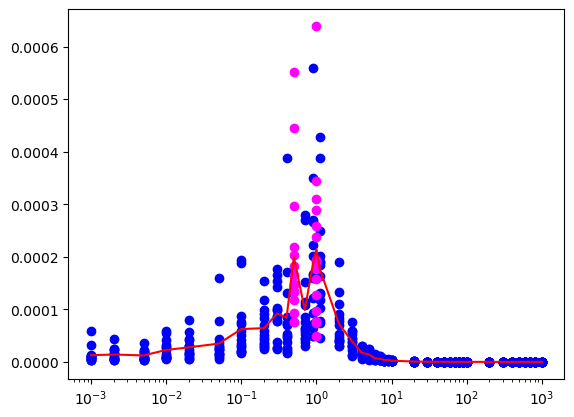

In [7]:
import os
xs = []
ys = []
for filename in os.listdir(path+'shcs__'):
    B = filename.split('B')[1].split('.')[0]
    B = float(B.replace(" ","."))
    shcs = np.load(path+'shcs__\\'+filename)
    for shc in shcs:
        if B in [0.5,1]:
            plt.scatter(B,shc,c='magenta')
        else:
            plt.scatter(B,shc,c='blue')
    xs.append(B)
    ys.append(np.mean(shcs))

xs_ = sorted(xs)
ys_ = np.array(sorted(zip(xs,ys)))[:,1]

plt.plot(xs_,ys_,c='red')
# plt.yscale('log')
plt.xscale('log')
plt.show()

Completed 9M steps for run B=10


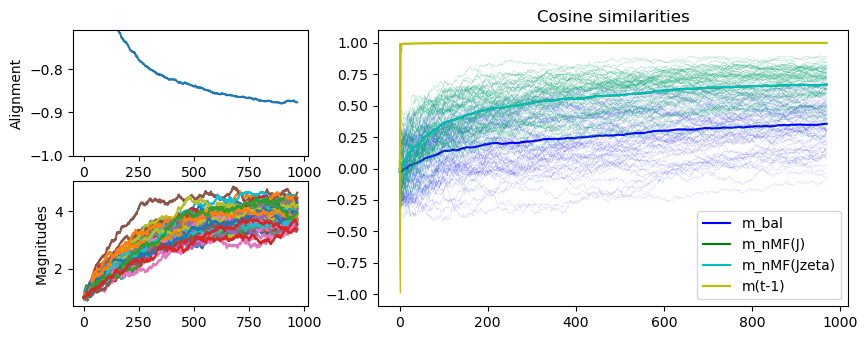

In [1]:
from VectorMC import *

model = VectorSpinMC(B=10,proposal_type='local_flip')
m_hist = model.fast_long_run(million_steps=10,equilibrate=True)
model.plot_TEs1(m_hist)


In [1]:
print(1e-2)
# try simulation with local proposals but including negative/flips

0.01


Completed 50M steps for run B=100


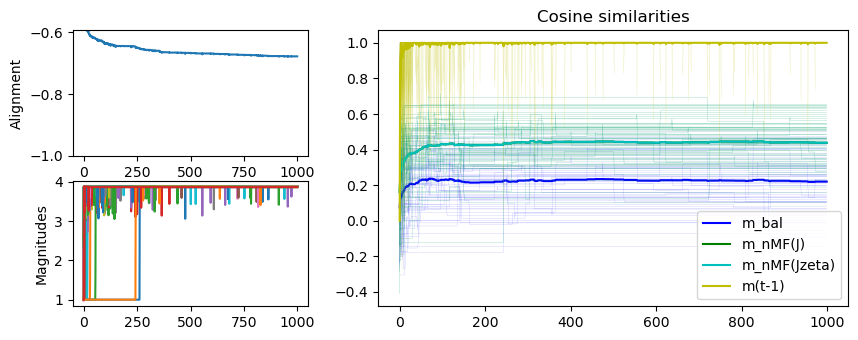

In [4]:
from VectorMC import *

model = VectorSpinMC(B=100,attn_norm='state',proposal_type='global')
m_hist = model.fast_long_run(million_steps=50,verbose=True,equilibrate=False)
model.plot_TEs1(m_hist)

Completed 50M steps for run B=1000


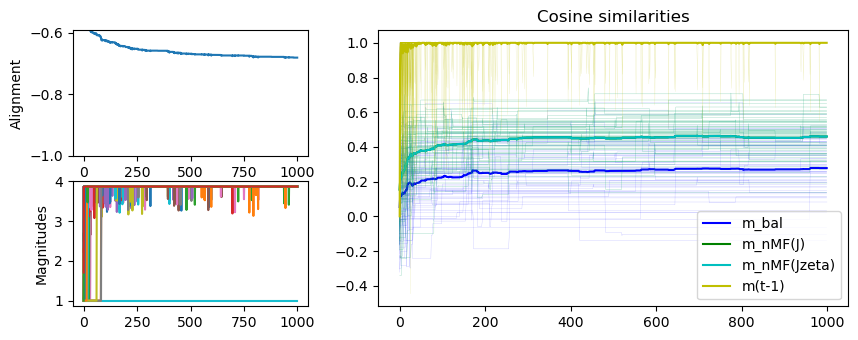

In [1]:
from VectorMC import *

model = VectorSpinMC(B=1000,attn_norm='state',proposal_type='global_fixR')
m_hist = model.fast_long_run(million_steps=50,verbose=True,equilibrate=False)
model.plot_TEs1(m_hist)

Completed 15M steps for run B=1000


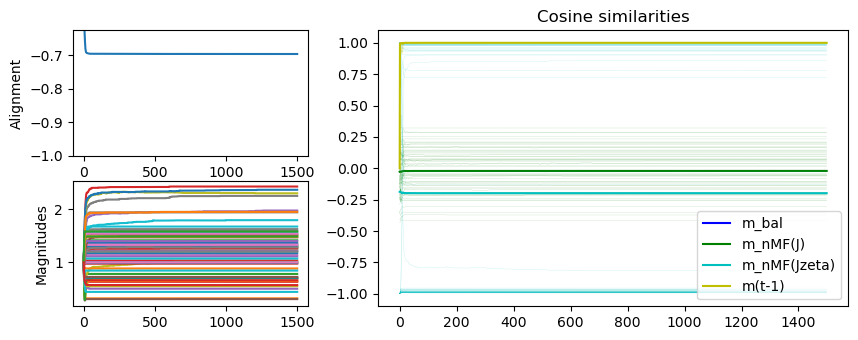

Completed 15M steps for run B=1000


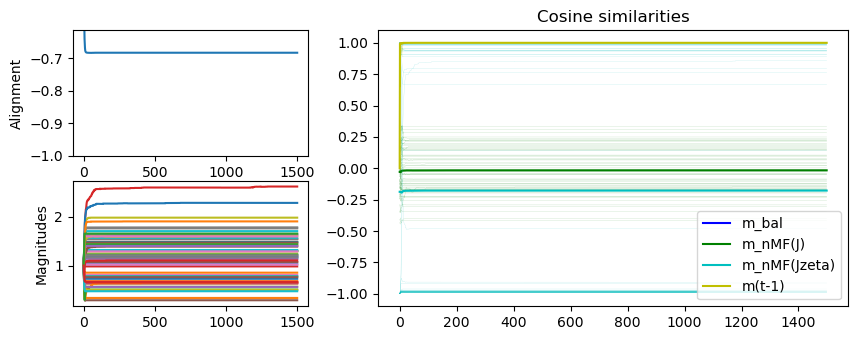

Completed 15M steps for run B=1000


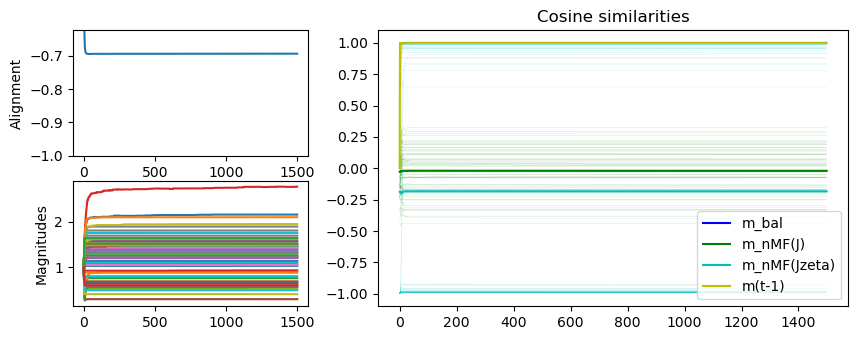

In [9]:
from VectorMC import *
x,J,m = load_generic_xJM()
x0 = np.zeros_like(x)
for i in range(3):
    model = VectorSpinMC(B=1000,init_xJm=[x0,J,m],attn_norm='state')
    m_hist = model.fast_long_run(million_steps=15,verbose=True)
    model.plot_TEs1(m_hist)

In [ ]:
# external field weights as biases or input?
# you would think m_0 is input of system, but that gets forgotten due to Markov process

Showing stability of MCMC solution

In [7]:
from VectorMC import *
temps = [30,2,1000,0.01]

path = 'C:\\Users\\ilove\\PycharmProjects\\MScThesis1_SpinTransformer\\equilibration\\'
for i,B in enumerate(temps):
    model = VectorSpinMC(B=B,reduction_type='N')
    m_hist = model.fast_long_run(million_steps=1.5)
    np.save(path+f'B{str(B).replace("."," ")}.npy',m_hist)

Completed 96M/1500k steps/time for run B=30
Completed 96M/1500k steps/time for run B=2
Completed 96M/1500k steps/time for run B=1000
Completed 96M/1500k steps/time for run B=0.01


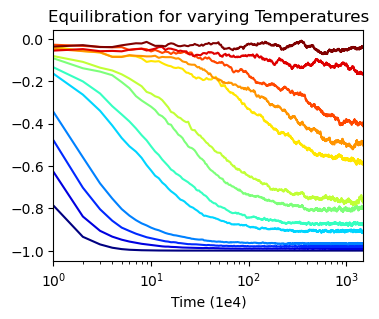

In [11]:
from VectorMC import *
x,J,m = load_generic_xJM()
R = np.sqrt(15)
path = 'C:\\Users\\ilove\\PycharmProjects\\MScThesis1_SpinTransformer\\equilibration\\'
def norm(m_,B,type='state'):
    alpha = 1
    if type == 'state':
        alpha = R / np.linalg.norm(x + np.matmul(J, m_), axis=1)[:, None]
    elif type == 'blog':
        alpha = B / (1 + np.sqrt(
            1 + (B ** 2) * (np.linalg.norm(x + np.matmul(J, m_), axis=1) ** 2) / (R ** 2))[:, None])
    return alpha

def ness_sim(m_hist,B):
    H_ising_normalised = np.zeros((np.shape(m_hist)[0],))
    for t in np.arange(len(m_hist)):
        A = norm(m_hist[t],B,type='state')
        attn = A * (x + np.matmul(J, m_hist[t]))
        H_ising = -np.trace(np.matmul(m_hist[t], attn.T))
        H_ising_normalised[t] = H_ising/(np.linalg.norm(m_hist[t])*np.linalg.norm(attn))
    return H_ising_normalised

temps = [1000,100,50,30,10,7,4,3,1,0.7,0.4,0.1,0.01]
from matplotlib import cm
colors = [cm.jet(x) for x in np.linspace(0.0, 1.0, len(temps)) ]
plt.figure(figsize=(4,3))
for B,color in zip(temps,colors):
    mhist = np.load(path+f'B{str(B).replace("."," ")}.npy')
    alignment = ness_sim(mhist,B)
    plt.plot(alignment,label=str(B),c=color)
    plt.xscale('log')
    plt.xlabel('Time (1e4)')
    plt.xlim(1,1500)
    plt.title(f'Equilibration for varying Temperatures')
plt.show()